## Difference Equations

### steady state solver

In [1]:
import sympy as sp
x1, x2, x3, alpha, beta, b = sp.symbols('x1, x2, x3, alpha, beta, b')
eq1 = sp.Eq((1-b)*x1/(x1+alpha*x2+beta*x3) + b*x1 - x1, 0)          
eq2 = sp.Eq((1-b)*x2/(beta*x1+ x2+alpha*x3) + b*x2 - x2, 0)         
eq3 = sp.Eq((1-b)*x3/(alpha*x1+beta*x2+x3) + b*x3 - x3, 0)
ans = sp.solve((eq1, eq2, eq3), (x1, x2, x3))
ans

[(0, 0, 1),
 (0, 1, 0),
 (0, (alpha - 1)/(alpha*beta - 1), (beta - 1)/(alpha*beta - 1)),
 (1, 0, 0),
 ((alpha - 1)/(alpha*beta - 1), (beta - 1)/(alpha*beta - 1), 0),
 ((beta - 1)/(alpha*beta - 1), 0, (alpha - 1)/(alpha*beta - 1)),
 (1/(alpha + beta + 1), 1/(alpha + beta + 1), 1/(alpha + beta + 1))]

In [10]:
# Discrete May-Leonard - equ(5) in Roeger+Allen paper
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

# Model Parameters
b = 0.75
alpha = 0.4
beta= 4.0


# Simulation Parameters
Ts = 0.5
Tstart = 0
Tstop =  2000
N = int((Tstop-Tstart)/Ts) # Simulation length

x1 = np.zeros(N+2)
x2 = np.zeros(N+2)
x3 = np.zeros(N+2)
x1[0] = 0.6
x2[0] = 0.5
x3[0] = 0.6

# Simulation
for k in range(N+1):
    x1[k+1] = (1-b)*x1[k]/(x1[k]+alpha*x2[k]+beta*x3[k]) + b*x1[k]
    x2[k+1] = (1-b)*x2[k]/(beta*x1[k]+ x2[k]+alpha*x3[k]) + b*x2[k]
    x3[k+1] = (1-b)*x3[k]/(alpha*x1[k]+beta*x2[k]+x3[k]) + b*x3[k]


In [11]:
#Stability

A = 1-alpha
B = beta-1
f = (B-A)*(B-A+3)/(A**2 + A*B + B**2)

cond = (b-1)
if f > cond:
    print("f(A,B) =", f, "> b-1 =", cond, "is unstable.")
elif f < cond:
    print("f(A,B) =", f, "< b-1 =", cond, "is stable.")

f(A,B) = 1.1612903225806452 > b-1 = -0.25 is unstable.


<IPython.core.display.Javascript object>


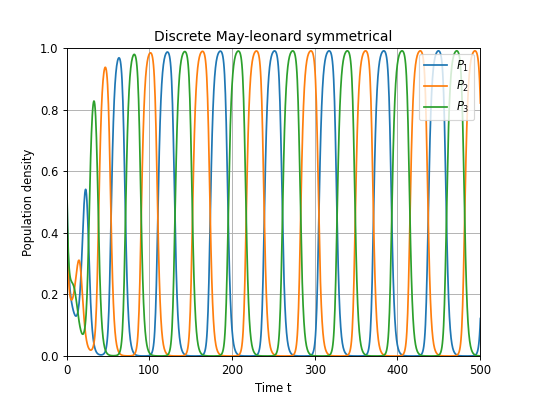

In [15]:
# Plot the Simulation Results
t = np.arange(Tstart,Tstop+2*Ts,Ts)
plt.plot(t, x1, label = r'$P_1$')
plt.plot(t, x2, label = r'$P_2$')
plt.plot(t, x3, label = r'$P_3$')
plt.title('Discrete May-leonard symmetrical')
plt.xlabel('Time t')
plt.ylabel('Population density')
plt.grid()
plt.axis([0, 500, 0.0, 1.0])
plt.legend(loc='upper right')
plt.savefig('difference1.pdf', dpi=400)
plt.show()

<IPython.core.display.Javascript object>


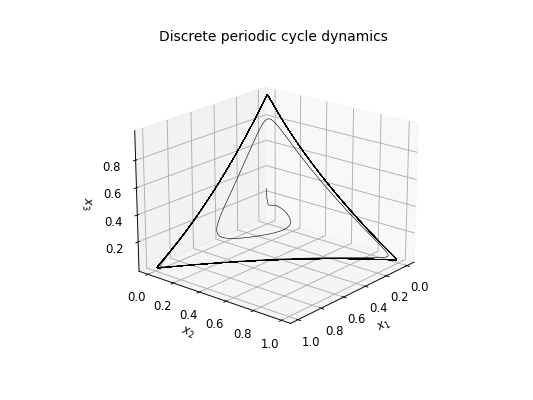

In [16]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(x1, x2, x3, 'black', lw=0.5)
ax.view_init(20, 40)
plt.title(r"Discrete periodic cycle dynamics")
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
ax.set_zlabel(r'$x_3$')
plt.savefig('difference3d.pdf', dpi=400)
plt.show()

## SECOND DIFFERENCE EQUATION

### steady state solver

In [17]:
#import sympy as sp
#x1, x2, x3, alpha, beta, b = sp.symbols('x1, x2, x3, alpha, beta, b')
#eq1 = sp.Eq(2*(1-b)*x1/(1+x1+alpha1*x2+beta1*x3) + b*x1 - x1, 0)          
#eq2 = sp.Eq(2*(1-b)*x2/(1+beta2*x1+ x2+alpha2*x3) + b*x2 - x2, 0)         
#eq3 = sp.Eq(2*(1-b)*x3/(1+alpha3*x1+beta3*x2+x3) + b*x3 - x3, 0)
#ans = sp.solve((eq1, eq2, eq3), (x1, x2, x3))
#ans

<IPython.core.display.Javascript object>


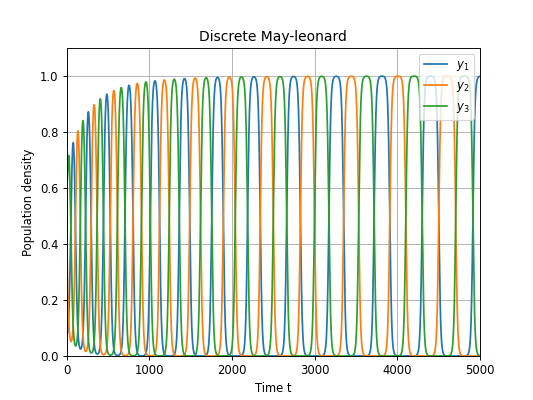

In [18]:
# Discrete May-Leonard - equ(7) in Roeger+Allen paper
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

# Model Parameters
b = 0.75
alpha = 1.4
beta= 0.7


# Simulation Parameters
Ts = 0.5
Tstart = 0
Tstop =  5000
N = int((Tstop-Tstart)/Ts) # Simulation length

y1 = np.zeros(N+2)
y2 = np.zeros(N+2)
y3 = np.zeros(N+2)
y1[0] = 0.1
y2[0] = 0.6
y3[0] = 0.7

# Simulation
for k in range(N+1):
    y1[k+1] = 2*(1-b)*y1[k]/(1 + y1[k]+alpha*y2[k]+beta*y3[k]) + b*y1[k]
    y2[k+1] = 2*(1-b)*y2[k]/(1 + beta*y1[k]+ y2[k]+alpha*y3[k]) + b*y2[k]
    y3[k+1] = 2*(1-b)*y3[k]/(1 + alpha*y1[k]+beta*y2[k]+y3[k]) + b*y3[k]
    
# Plot the Simulation Results
t = np.arange(Tstart,Tstop+2*Ts,Ts)
plt.plot(t, y1, label = r'$y_1$')
plt.plot(t, y2, label = r'$y_2$')
plt.plot(t, y3, label = r'$y_3$')
plt.title('Discrete May-leonard')
plt.xlabel('Time t')
plt.ylabel('Population density')
plt.grid()
plt.axis([0, 5000, 0.0, 1.1])
plt.legend(loc='upper right')
plt.savefig('differencespiral.pdf', dpi=400)
plt.show()



In [19]:
#Stability

A = 1-alpha
B = beta-1
f = (B-A)*(B-A+3)/(A**2 + A*B + B**2)

cond = (b-1)/2
if f > cond:
    print("f(A,B) =", f, "> b-1 =", cond, "is unstable.")
elif f < cond:
    print("f(A,B) =", f, "< b-1 =", cond, "is stable.")

f(A,B) = 0.8378378378378367 > b-1 = -0.125 is unstable.


<IPython.core.display.Javascript object>


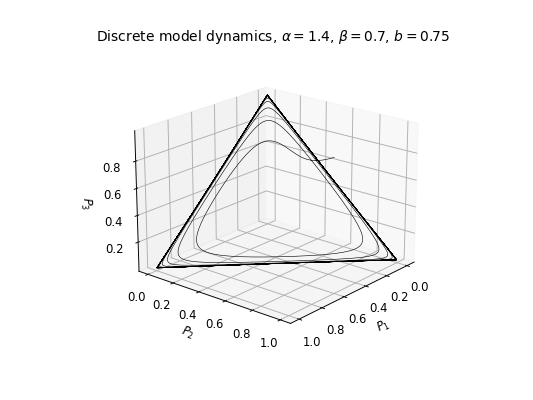

In [20]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(y1, y2, y3, 'black', lw=0.5)
ax.view_init(20, 40)
plt.title(r"Discrete model dynamics, $\alpha =$" + str(alpha) + r", $\beta =$" + str(beta) + r", $b =$" + str(b))
plt.xlabel(r'$P_1$')
plt.ylabel(r'$P_2$')
ax.set_zlabel(r'$P_3$')
plt.savefig('difference23d.pdf', dpi=400)
plt.show()

### $b = 0.75, \alpha = 0.4, \beta = 1.4$

<IPython.core.display.Javascript object>


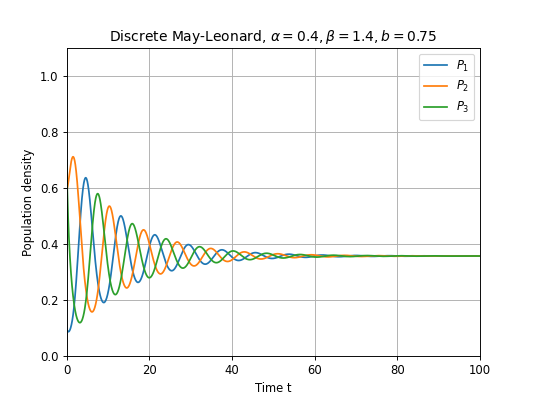

In [31]:
# Discrete May-Leonard - equ(7) in Roeger+Allen paper
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

# Model Parameters
b = 0.75
alpha = 0.4
beta= 1.4


# Simulation Parameters
Ts = 0.05
Tstart = 0
Tstop =  1000
N = int((Tstop-Tstart)/Ts) # Simulation length

z1 = np.zeros(N+2)
z2 = np.zeros(N+2)
z3 = np.zeros(N+2)
z1[0] = 0.1
z2[0] = 0.6
z3[0] = 0.7

# Simulation
for k in range(N+1):
    z1[k+1] = 2*(1-b)*z1[k]/(1 + z1[k]+alpha*z2[k]+beta*z3[k]) + b*z1[k]
    z2[k+1] = 2*(1-b)*z2[k]/(1 + beta*z1[k]+ z2[k]+alpha*z3[k]) + b*z2[k]
    z3[k+1] = 2*(1-b)*z3[k]/(1 + alpha*z1[k]+beta*z2[k]+z3[k]) + b*z3[k]
    
# Plot the Simulation Results
t = np.arange(Tstart,Tstop+2*Ts,Ts)
plt.plot(t, z1, label = r'$P_1$')
plt.plot(t, z2, label = r'$P_2$')
plt.plot(t, z3, label = r'$P_3$')
plt.title(r'Discrete May-Leonard, $\alpha = 0.4, \beta = 1.4, b = 0.75$')
plt.xlabel('Time t')
plt.ylabel('Population density')
plt.grid()
plt.axis([0, 100, 0.0, 1.1])
plt.legend(loc='upper right')
plt.savefig('difference3.pdf', dpi=400)
plt.show()



<IPython.core.display.Javascript object>


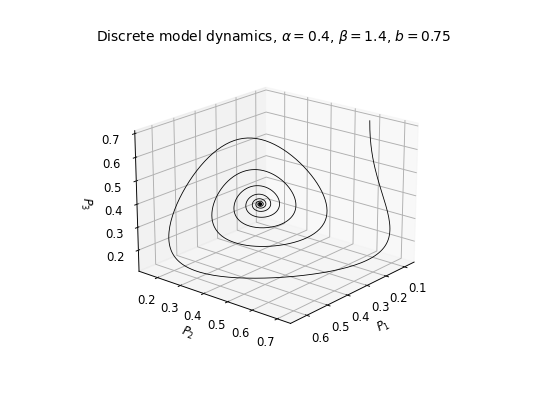

In [32]:
fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(z1, z2, z3, 'black', lw=0.7)
ax.view_init(20, 40)
plt.title(r"Discrete model dynamics, $\alpha =$" + str(alpha) + r", $\beta =$" + str(beta) + r", $b =$" + str(b))
plt.xlabel(r'$P_1$')
plt.ylabel(r'$P_2$')
ax.set_zlabel(r'$P_3$')
plt.savefig('difference33d.pdf', dpi=400)
plt.show()

In [24]:
#Stability Checker

A = 1-alpha
B = beta-1
f = (B-A)*(B-A+3)/(A**2 + A*B + B**2)

cond = (b-1)/2
if f > cond:
    print("f(A,B) =", f, "> (b-1)/2 =", cond, "is unstable.")
elif f < cond:
    print("f(A,B) =", f, "< (b-1)/2 =", cond, "is stable.")

f(A,B) = -0.7368421052631583 < (b-1)/2 = -0.125 is stable.


### $\beta = 1.5575097$ Hopf Bifurcation

<IPython.core.display.Javascript object>


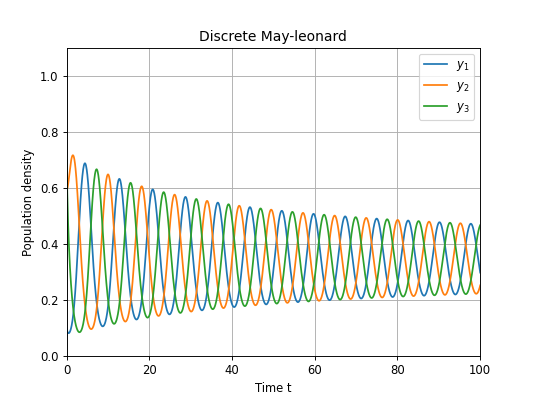

In [25]:
# Discrete May-Leonard - equ(7) in Roeger+Allen paper
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

# Model Parameters
b = 0.75
alpha = 0.4
beta= 1.55750973633500


# Simulation Parameters
Ts = 0.05
Tstart = 0
Tstop =  500
N = int((Tstop-Tstart)/Ts) # Simulation length

yy1 = np.zeros(N+2)
yy2 = np.zeros(N+2)
yy3 = np.zeros(N+2)
yy1[0] = 0.1
yy2[0] = 0.6
yy3[0] = 0.7

# Simulation
for k in range(N+1):
    yy1[k+1] = 2*(1-b)*yy1[k]/(1 + yy1[k]+alpha*yy2[k]+beta*yy3[k]) + b*yy1[k]
    yy2[k+1] = 2*(1-b)*yy2[k]/(1 + beta*yy1[k]+ yy2[k]+alpha*yy3[k]) + b*yy2[k]
    yy3[k+1] = 2*(1-b)*yy3[k]/(1 + alpha*yy1[k]+beta*yy2[k]+yy3[k]) + b*yy3[k]
    
# Plot the Simulation Results
t = np.arange(Tstart,Tstop+2*Ts,Ts)
plt.plot(t, yy1, label = r'$y_1$')
plt.plot(t, yy2, label = r'$y_2$')
plt.plot(t, yy3, label = r'$y_3$')
plt.title('Discrete May-leonard')
plt.xlabel('Time t')
plt.ylabel('Population density')
plt.grid()
plt.axis([0, 100, 0.0, 1.1])
plt.legend(loc='upper right')
plt.savefig('difference2.pdf', dpi=400)
plt.show()



<IPython.core.display.Javascript object>


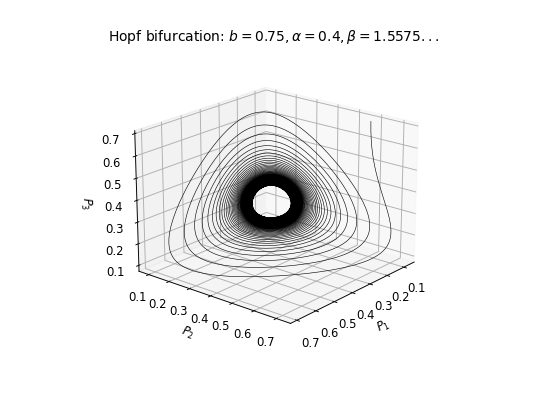

In [26]:
#Hopf bifurcation \beta = 1.55750973633500 so f(A,B) = (b-1)/2

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(yy1, yy2, yy3, 'black', lw=0.5)
ax.view_init(20, 40)
plt.title(r"Hopf bifurcation: $b = 0.75, \alpha = 0.4, \beta = 1.5575...$")
plt.xlabel(r'$P_1$')
plt.ylabel(r'$P_2$')
ax.set_zlabel(r'$P_3$')
plt.savefig('differencehopf.pdf', dpi=400)
plt.show()

In [27]:
#Stability Checker

A = 1-alpha
B = beta-1
f = (B-A)*(B-A+3)/(A**2 + A*B + B**2)

cond = (b-1)/2
if f > cond:
    print("f(A,B) =", f, "> (b-1)/2 =", cond, "is unstable.")
elif f < cond:
    print("f(A,B) =", f, "< (b-1)/2 =", cond, "is stable.")

f(A,B) = -0.12500000000001382 < (b-1)/2 = -0.125 is stable.


<IPython.core.display.Javascript object>


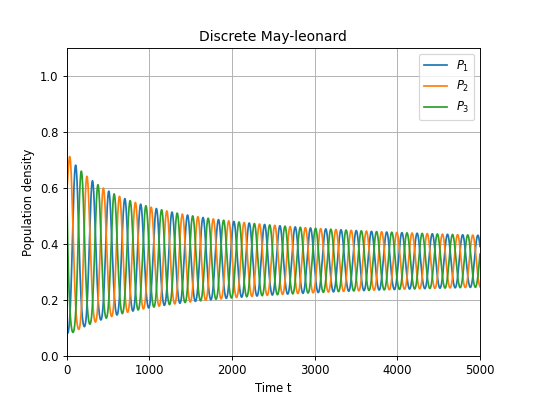

In [28]:
# Discrete May-Leonard - equ(7) in Roeger+Allen paper
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate

# Model Parameters
b = 0.99
alpha = 0.4
beta= 1.6

# Simulation Parameters
Ts = 0.05
Tstart = 0
Tstop =  5000
N = int((Tstop-Tstart)/Ts) # Simulation length

zz1 = np.zeros(N+2)
zz2 = np.zeros(N+2)
zz3 = np.zeros(N+2)
zz1[0] = 0.1
zz2[0] = 0.6
zz3[0] = 0.7

# Simulation
for k in range(N+1):
    zz1[k+1] = 2*(1-b)*zz1[k]/(1 + zz1[k]+alpha*zz2[k]+beta*zz3[k]) + b*zz1[k]
    zz2[k+1] = 2*(1-b)*zz2[k]/(1 + beta*zz1[k]+ zz2[k]+alpha*zz3[k]) + b*zz2[k]
    zz3[k+1] = 2*(1-b)*zz3[k]/(1 + alpha*zz1[k]+beta*zz2[k]+zz3[k]) + b*zz3[k]
    
# Plot the Simulation Results
t = np.arange(Tstart,Tstop+2*Ts,Ts)
plt.plot(t, zz1, label = r'$P_1$')
plt.plot(t, zz2, label = r'$P_2$')
plt.plot(t, zz3, label = r'$P_3$')
plt.title('Discrete May-leonard')
plt.xlabel('Time t')
plt.ylabel('Population density')
plt.grid()
plt.axis([0, 5000, 0.0, 1.1])
plt.legend(loc='upper right')
plt.savefig('difference2Dhopf.pdf', dpi=400)
plt.show()



<IPython.core.display.Javascript object>


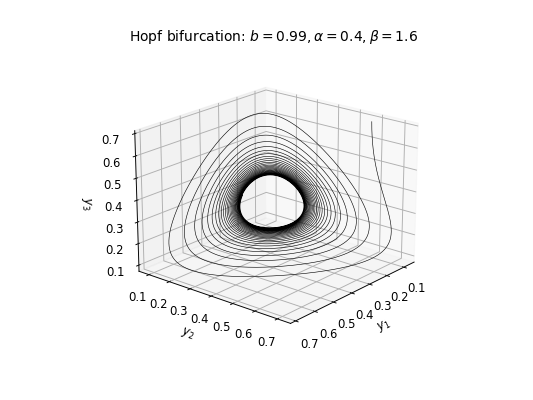

In [29]:
#Hopf bifurcation \beta = 1.55750973633500 so f(A,B) = (b-1)/2

fig2 = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(zz1, zz2, zz3, 'black', lw=0.5)
ax.view_init(20, 40)
plt.title(r"Hopf bifurcation: $b = 0.99, \alpha = 0.4, \beta = 1.6$")
plt.xlabel(r'$y_1$')
plt.ylabel(r'$y_2$')
ax.set_zlabel(r'$y_3$')
plt.savefig('differencehopf2.pdf', dpi=400)
plt.show()

In [30]:
#Stability Checker

A = 1-alpha
B = beta-1
f = (B-A)*(B-A+3)/(A**2 + A*B + B**2)

cond = (b-1)/2
if f > cond:
    print("f(A,B) =", f, "> (b-1)/2 =", cond, "is unstable.")
elif f < cond:
    print("f(A,B) =", f, "< (b-1)/2 =", cond, "is stable.")

f(A,B) = 3.0839528461809903e-16 > (b-1)/2 = -0.0050000000000000044 is unstable.
